# SPRINT 2.  MARKETING

## 1. IMPORTACIÓN BBDD I CREACIÓN DEL DF

In [124]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.
Taula 'BANK_marketing131024' carregada correctament.


In [125]:
def ordenar_categoria_duration(valor):
     
     orden=0
     match valor:
         
        case "muy bajo":
            orden=1
        case "bajo":
            orden=2
        case "medio-bajo":
            orden=3
        case "medio-alto":
            orden=4
        case "alto":
            orden=5
        case "muy-alto":
            orden=6
        case "extremo-muy-alto":
            orden=7
        case _:
            orden=-1
     return orden
   

In [126]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

def clasificacion_duration(valor):
    
    if  valor < min_Q_ext:
        return "extremo-muy-bajo"
    elif valor < min_Q:
        return "muy bajo"
    elif valor < Q1:
        return "bajo"
    elif valor < Q2:
        return "medio-bajo"
    elif valor < Q3:
        return "medio-alto"
    elif valor < max_Q:
        return "alto"
    elif valor < max_Q_ext:
        return "muy-alto"
    else:
        return "extremo-muy-alto"

## 1.1 Parametros globales de visualización matplotlib seaborn

In [127]:
plt.style.use("seaborn-v0_8-deep")

# Configuración de parámetros globales para Matplotlib
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'figure.figsize': (12, 6),
    'figure.dpi': 100,
    'legend.loc': 'upper right'
})

# Configuración de estilo y contexto de Seaborn
#sns.set(style="whitegrid")  # Estilo del gráfico
sns.set_context("notebook", font_scale=1.2, rc={
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 12 
})


In [128]:
df_BANK_marketing=df['BANK_marketing131024']

In [129]:
df_BANK_marketing.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1


In [130]:
df_BANK_marketing

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,26,admin.,married,secondary,0,1595,0,0,cellular,15,jun,155,1,105,1,failure,1
16159,21380,37,admin.,married,secondary,0,1967,0,0,cellular,27,may,242,1,212,1,success,1
16160,21381,45,management,married,tertiary,0,81,0,1,cellular,30,jul,61,3,-1,0,unknown,0
16161,21382,44,services,single,secondary,0,618,0,0,cellular,12,may,193,1,-1,0,unknown,1


## 2. EDA: ANÁLISIS EXPLORATÓRIO

Ya tenemos todos los datos limpios y esto se puede comprobar, ya que ya no tenemos null. En principio, no deberían haber outliers


In [131]:
df_BANK_marketing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16163 non-null  int64 
 1   age        16163 non-null  int64 
 2   job        16163 non-null  object
 3   marital    16163 non-null  object
 4   education  16163 non-null  object
 5   default    16163 non-null  int64 
 6   balance    16163 non-null  int64 
 7   housing    16163 non-null  int64 
 8   loan       16163 non-null  int64 
 9   contact    16163 non-null  object
 10  day        16163 non-null  int64 
 11  month      16163 non-null  object
 12  duration   16163 non-null  int64 
 13  campaign   16163 non-null  int64 
 14  pdays      16163 non-null  int64 
 15  previous   16163 non-null  int64 
 16  poutcome   16163 non-null  object
 17  deposit    16163 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 2.2+ MB


## 2.1 Verificación estadísticos dataset con cleaning frente original

In [132]:
df_BANK_marketing['job'].value_counts()

job
management       3727
blue-collar      2812
technician       2667
admin.           1907
services         1314
retired          1128
self-employed     599
student           518
unemployed        514
entrepreneur      472
housemaid         399
unknown           106
Name: count, dtype: int64

In [133]:
df_BANK_marketing['marital'].value_counts()

marital
married     9226
single      5065
divorced    1872
Name: count, dtype: int64

In [134]:
df_BANK_marketing['education'].value_counts()

education
secondary    7931
tertiary     5355
primary      2172
unknown       705
Name: count, dtype: int64

In [135]:
df_BANK_marketing['default'].value_counts()

default
0    15922
1      241
Name: count, dtype: int64

In [136]:
df_BANK_marketing['contact'].value_counts()

contact
cellular     11628
unknown       3388
telephone     1147
Name: count, dtype: int64

In [137]:
df_BANK_marketing['poutcome'].value_counts()

poutcome
unknown    12076
failure     1777
success     1527
other        783
Name: count, dtype: int64

In [138]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [139]:
df_BANK_vista_marketing['contact'].value_counts()

contact
cellular     11628
unknown       3388
telephone     1147
Name: count, dtype: int64

In [140]:
count_contact=df_BANK_vista_marketing["contact"].value_counts()
df_count_contact=pd.DataFrame(count_contact)
df_count_contact

,count
contact,
cellular,11628
unknown,3388
telephone,1147


Text(0.5, 1.0, 'Tipos de contacto última llamada')

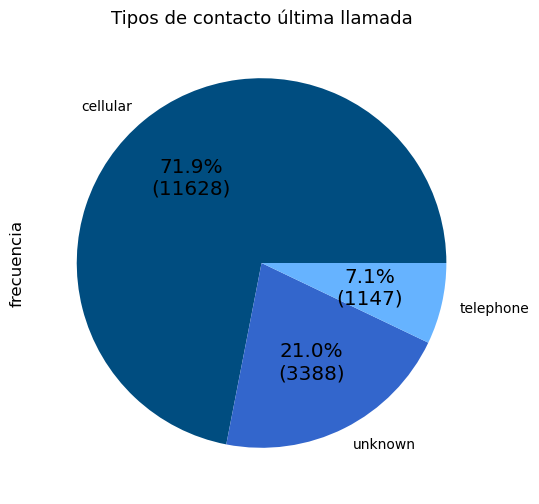

In [141]:
#funció per mostrar els valors i porcentatges del pie
def func(pct, allvalues):
    absolute = int(round(pct/100.*sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

#Especifico una tonalitat de colors blaus per pintar el gràfic de sectors per estètica. De blau més fort a blau més clar
colors = ['#004d80','#3366cc','#66b3ff']


ax=df_count_contact["count"].plot.pie(autopct=lambda pct: func(pct, df_count_contact["count"]),colors=colors)

ax.set_ylabel("frecuencia")
ax.set_title("Tipos de contacto última llamada")

Vemos que tenemos un problema, en teoria el campo contact, solo puede valer telephone o cellular, primero porque lo dice la fuente oficial de la página web de Bank_marketing, y en segundo lugar porque en cada registro existe una duración de llamada, **pero tenemos 2346, un 21% de registros "unknown"**.

Como tendremos que calcular la tasa de conversión del Dataset, y emplearemos rangos de duración para calcularla, de momento, no hacemos ningún tratamiento para intentar clasificar los unknown a otra etiqueta, que en principio sería cellular y telephone.

In [142]:
filtro_contact_unknown=df_BANK_vista_marketing['contact']=='unknown'
count_contact_poutcome=df_BANK_vista_marketing['poutcome']

poutcome_value_counts=df_BANK_vista_marketing[filtro_contact_unknown]['poutcome'].value_counts()
df_poutcome_value_counts=pd.DataFrame(poutcome_value_counts)
df_poutcome_value_counts

,count
poutcome,
unknown,3360
failure,11
other,9
success,8


In [143]:
df_poutcome_value_counts=df_poutcome_value_counts.reset_index()
df_poutcome_value_counts

,poutcome,count
0,unknown,3360
1,failure,11
2,other,9
3,success,8


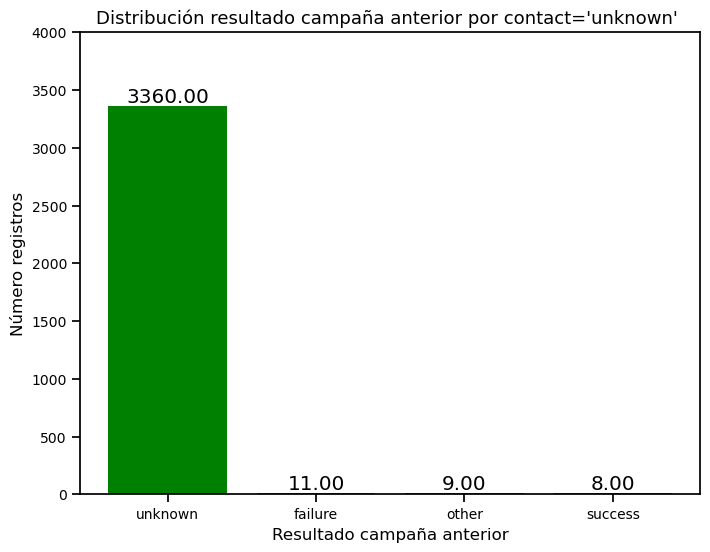

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

colors = ['green']
bars=ax.bar(df_poutcome_value_counts['poutcome'], df_poutcome_value_counts['count'],color=colors)

# Añadir títulos y etiquetas

#plt.xticks(rotation=45)

ax.set_ylim(0, 4000)
ax.autoscale(False)
plt.title("Distribución resultado campaña anterior por contact='unknown' ")
plt.xlabel("Resultado campaña anterior")
plt.ylabel("Número registros")

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

In [145]:
#Per poder analitzar la segona pregunta de l'exercici
#filtro_cellular=df_BANK_vista_marketing['contact']=='telephone'
#df_BANK_vista_marketing=df_BANK_vista_marketing[filtro_cellular]

df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000
mean,9696.799233,15.647157,372.542288,2.508816,51.326734,0.824909,0.473860
std,6754.310906,8.417469,345.261981,2.751196,109.031324,2.241574,0.499332
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,4041.500000,8.000000,139.000000,1.000000,-1.000000,0.000000,0.000000
50%,8082.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,17342.500000,22.000000,498.000000,3.000000,10.000000,1.000000,1.000000
max,21383.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [146]:
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles(df_BANK_vista_marketing['duration'])
df_BANK_vista_marketing["categoria_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)

C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\1569162738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing["categoria_duration"] = df_BANK_vista_marketing["duration"].apply(clasificacion_duration)


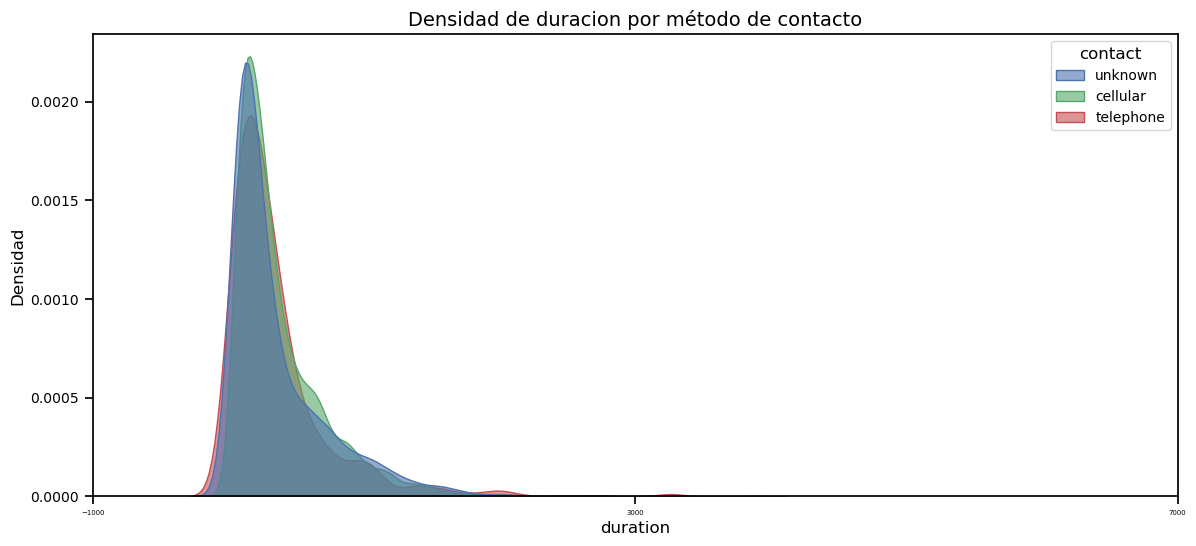

In [147]:
plt.figure(figsize=(14, 6))

sns.kdeplot(data=df_BANK_vista_marketing, x='duration', hue='contact', fill=True, common_norm=False, alpha=0.6)

plt.title('Densidad de duracion por método de contacto', fontsize=14)
plt.xlabel('duration')
plt.ylabel('Densidad')

plt.xticks(range(-1000,10000,4000), fontsize=5)

plt.show()

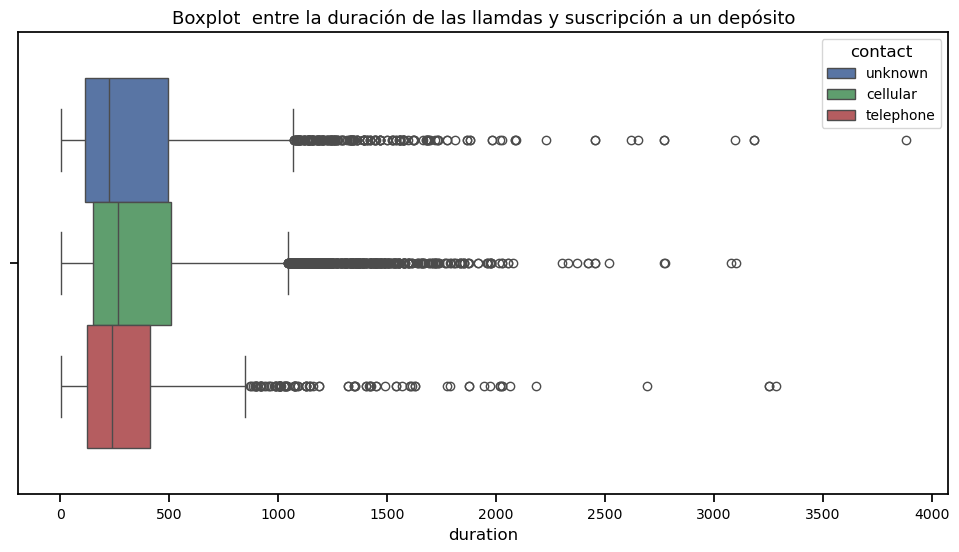

In [148]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
custom_palette = ['skyblue', 'salmon']
sns.boxplot(x='duration',data=df_BANK_vista_marketing, hue='contact')
plt.title('Boxplot  entre la duración de las llamdas y suscripción a un depósito')
plt.show()

## 3. Calcular tasa de conversión por categorías de grupos y tipos de contacto

Quiero trocear el segmento duración en trocitos más pequeños, pero para eso quiero ver los estadísticos princiaples

In [149]:
df_BANK_vista_marketing['duration'].describe()

count    16163.000000
mean       372.542288
std        345.261981
min          2.000000
25%        139.000000
50%        255.000000
75%        498.000000
max       3881.000000
Name: duration, dtype: float64

In [150]:
positive_infinity = float('inf')
df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])
df_BANK_vista_marketing

C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\2879743195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing['rango_duracion'] = pd.cut(df_BANK_vista_marketing['duration'], bins=[0, Q1, Q2, Q3, max_Q, max_Q_ext, positive_infinity])


,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
1,2,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
2,3,unknown,5,may,1467,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
3,4,unknown,5,may,1389,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
4,5,unknown,5,may,579,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


Quiero agrupar las etiquetas de range_duration y sumar los 1 de cada rango de los depósitos y los registros por depósito

In [151]:
df_BANK_vista_marketing

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
0,1,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
1,2,unknown,5,may,1042,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
2,3,unknown,5,may,1467,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
3,4,unknown,5,may,1389,1,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
4,5,unknown,5,may,579,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


In [152]:
filtre_cellular=df_BANK_vista_marketing['contact']=="cellular"
df_BANK_vista_marketing[filtre_cellular]

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
368,369,cellular,4,jul,1044,3,-1,0,unknown,1,muy-alto,"(1036.5, 1575.0]"
369,370,cellular,7,jul,494,4,-1,0,unknown,1,medio-alto,"(255.0, 498.0]"
370,371,cellular,7,jul,615,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
371,372,cellular,7,jul,718,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
372,373,cellular,7,jul,434,3,-1,0,unknown,1,medio-alto,"(255.0, 498.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16158,21379,cellular,15,jun,155,1,105,1,failure,1,medio-bajo,"(139.0, 255.0]"
16159,21380,cellular,27,may,242,1,212,1,success,1,medio-bajo,"(139.0, 255.0]"
16160,21381,cellular,30,jul,61,3,-1,0,unknown,0,bajo,"(0.0, 139.0]"
16161,21382,cellular,12,may,193,1,-1,0,unknown,1,medio-bajo,"(139.0, 255.0]"


In [153]:
df_BANK_vista_marketing[filtre_cellular].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000
mean,9468.193584,15.598813,376.535346,2.389233,65.390523,1.037754,0.542570
std,6848.454807,8.384701,329.277265,2.407707,117.956673,2.423482,0.498206
min,369.000000,1.000000,6.000000,1.000000,-1.000000,0.000000,0.000000
25%,3587.750000,8.000000,149.000000,1.000000,-1.000000,0.000000,0.000000
50%,7569.000000,15.000000,266.000000,2.000000,-1.000000,0.000000,1.000000
75%,17329.250000,22.000000,507.000000,3.000000,96.000000,1.000000,1.000000
max,21383.000000,31.000000,3102.000000,43.000000,854.000000,58.000000,1.000000


In [154]:
filtre_telephone=df_BANK_vista_marketing['contact']=="telephone"
df_BANK_vista_marketing[filtre_telephone].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000,1147.000000
mean,9853.324324,15.942459,349.574542,2.958152,52.672188,1.006103,0.503923
std,6820.479196,8.852988,379.428143,3.173020,106.498100,2.689414,0.500203
min,487.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,3724.500000,8.500000,125.000000,1.000000,-1.000000,0.000000,0.000000
50%,8113.000000,15.000000,236.000000,2.000000,-1.000000,0.000000,1.000000
75%,17444.000000,23.000000,414.000000,4.000000,70.000000,1.000000,1.000000
max,21342.000000,31.000000,3284.000000,43.000000,690.000000,37.000000,1.000000


In [155]:
filtre_unknown=df_BANK_vista_marketing['contact']=="unknown"
df_BANK_vista_marketing[filtre_unknown].describe()

,id,day,duration,campaign,pdays,previous,deposit
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,10428.408501,15.713105,366.613341,2.767119,2.602715,0.033058,0.227863
std,6342.276517,8.378469,384.244706,3.553433,45.502383,0.757269,0.419516
min,1.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000
25%,6341.250000,8.000000,115.000000,1.000000,-1.000000,0.000000,0.000000
50%,9066.500000,16.000000,226.000000,2.000000,-1.000000,0.000000,0.000000
75%,17362.000000,21.000000,496.500000,3.000000,-1.000000,0.000000,0.000000
max,21377.000000,31.000000,3881.000000,63.000000,782.000000,41.000000,1.000000


In [156]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  16163 non-null  int64   
 1   contact             16163 non-null  object  
 2   day                 16163 non-null  int64   
 3   month               16163 non-null  object  
 4   duration            16163 non-null  int64   
 5   campaign            16163 non-null  int64   
 6   pdays               16163 non-null  int64   
 7   previous            16163 non-null  int64   
 8   poutcome            16163 non-null  object  
 9   deposit             16163 non-null  int64   
 10  categoria_duration  16163 non-null  object  
 11  rango_duracion      16163 non-null  category
dtypes: category(1), int64(7), object(4)
memory usage: 1.4+ MB


In [157]:
df_marketing_group_by_categ_durat_contact = df_BANK_vista_marketing.groupby(["categoria_duration", "contact"])["deposit"].agg(['mean','count'])
columns={'mean':'tasa_de_conversión','count':'total_registros'}
df_marketing_group_by_categ_durat_contact.rename(columns={'mean':'tasa_conversion','count':'total_registros'},inplace=True)
df_marketing_group_by_categ_durat_contact

tasa_conversion  total_registros
categoria_duration contact                                    
alto               cellular          0.821580             2354
                   telephone         0.869822              169
                   unknown           0.698020              606
bajo               cellular          0.159013             2635
                   telephone         0.082067              329
                   unknown           0.031250             1056
extremo-muy-alto   cellular          0.954545               88
                   telephone         0.857143               21
                   unknown           0.933333               45
medio-alto         cellular          0.639704             3103
                   telephone         0.695793              309
                   unknown           0.112654              648
medio-bajo         cellular          0.483539             2916
                   telephone         0.487544              281
                   unknown           0.035842              837
muy-alto           cellular          0.896617              532
                   telephone         0.894737               38
                   unknown           0.872449              196

In [158]:
df_marketing_group_by_categ_durat_contact=df_marketing_group_by_categ_durat_contact.reset_index()
df_marketing_group_by_categ_durat_contact

,categoria_duration,contact,tasa_conversion,total_registros
0,alto,cellular,0.821580,2354
1,alto,telephone,0.869822,169
2,alto,unknown,0.698020,606
3,bajo,cellular,0.159013,2635
4,bajo,telephone,0.082067,329
5,bajo,unknown,0.031250,1056
6,extremo-muy-alto,cellular,0.954545,88
7,extremo-muy-alto,telephone,0.857143,21
8,extremo-muy-alto,unknown,0.933333,45
9,medio-alto,cellular,0.639704,3103


In [159]:
df_reset=df_marketing_group_by_categ_durat_contact.reset_index()
pivot_df = df_reset.pivot(index="categoria_duration", columns="contact", values="total_registros")
pivot_df["total_registros"]=pivot_df["cellular"]+pivot_df["telephone"]+pivot_df["unknown"]
pivot_df


contact,cellular,telephone,unknown,total_registros
categoria_duration,,,,
alto,2354,169,606,3129
bajo,2635,329,1056,4020
extremo-muy-alto,88,21,45,154
medio-alto,3103,309,648,4060
medio-bajo,2916,281,837,4034
muy-alto,532,38,196,766


In [160]:
pivot_df=pivot_df.reset_index()
#pivot_df=pivot_df.set_index("categoria_duration")
#pivot_df
pivot_df

contact,categoria_duration,cellular,telephone,unknown,total_registros
0,alto,2354,169,606,3129
1,bajo,2635,329,1056,4020
2,extremo-muy-alto,88,21,45,154
3,medio-alto,3103,309,648,4060
4,medio-bajo,2916,281,837,4034
5,muy-alto,532,38,196,766


In [161]:
pivot_df_copy=pd.DataFrame({"categoria_duration":pivot_df["categoria_duration"],
                         "cellular":pivot_df["cellular"],
                         "telephone":pivot_df["telephone"],
                         "unknown":pivot_df["unknown"],
                         "total_registros":pivot_df["total_registros"]})
pivot_df_copy




,categoria_duration,cellular,telephone,unknown,total_registros
0,alto,2354,169,606,3129
1,bajo,2635,329,1056,4020
2,extremo-muy-alto,88,21,45,154
3,medio-alto,3103,309,648,4060
4,medio-bajo,2916,281,837,4034
5,muy-alto,532,38,196,766


In [162]:
pivot_df_copy["ordre_categoria_duracion"]=pivot_df_copy["categoria_duration"].apply(ordenar_categoria_duration)
pivot_df_copy=pivot_df_copy.sort_values("ordre_categoria_duracion")
pivot_df_copy=pivot_df_copy.set_index("categoria_duration")
pivot_df_copy

,cellular,telephone,unknown,total_registros,ordre_categoria_duracion
categoria_duration,,,,,
bajo,2635,329,1056,4020,2
medio-bajo,2916,281,837,4034,3
medio-alto,3103,309,648,4060,4
alto,2354,169,606,3129,5
muy-alto,532,38,196,766,6
extremo-muy-alto,88,21,45,154,7


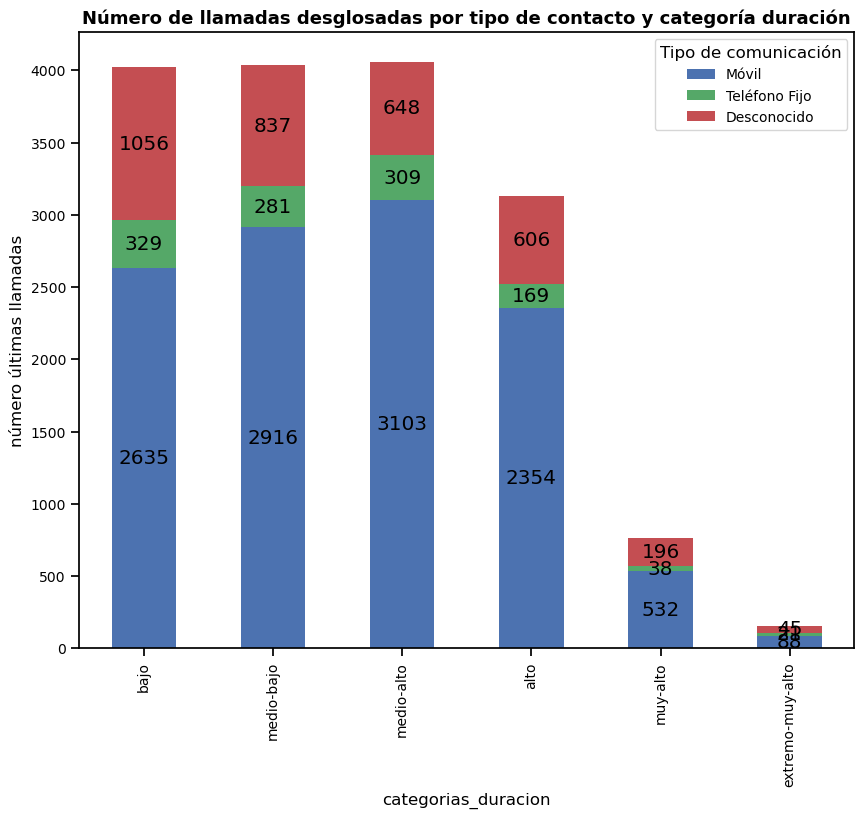

In [163]:
#order = ['bajo', 'medio-bajo', 'medio-alto', 'alto', 'muy-alto', 'extremo-muy-alto']
#pivot_df = pivot_df.set_index('categoría')

# Reordenar el índice del DataFrame según el orden deseado
#pivot_df = pivot_df.reindex(order)

ax=pivot_df_copy[["cellular","telephone","unknown"]].plot.bar(stacked=True)

fig = ax.figure
# Ajustar las dimensiones de la figura
fig.set_size_inches(10, 8)
ax.set_title("Número de llamadas desglosadas por tipo de contacto y categoría duración",fontweight='bold')
ax.set_xlabel("categorias_duracion")
ax.set_ylabel("número últimas llamadas")
legend=ax.legend()
legend.set_title("tipo de contacto")

# Cambiar los nombres de la leyenda
new_legend_labels = ['Móvil', 'Teléfono Fijo', 'Desconocido']
legend = ax.legend(labels=new_legend_labels)
legend.set_title("Tipo de comunicación")

  
# Iterar sobre els contenidos i les barres per pintar cada valor de cada barra al centre de la barra.
for container in ax.containers:
    # Obtener los valores de las barras y su posición
    labels = []
    for bar in container:
        value = bar.get_height()  # Para barras apiladas se usa el alto
        if value == 0:
            labels.append('')  # No etiquetar barras con valor cero
        else:
            labels.append(f'{value:.0f}')  # Formatear los valores sin decimales
    ax.bar_label(container, labels=labels, label_type='center')



In [164]:
df_marketing_group_by_categ_durat_contact["ord_categoria_duration"]=df_marketing_group_by_categ_durat_contact["categoria_duration"].apply(ordenar_categoria_duration)
df_marketing_group_by_categ_durat_contact.sort_values("ord_categoria_duration")

def categoria_y_rango(cadena):

 match cadena:
    case 'bajo':
        return '(0 a 2] min, bajo'

    case 'medio-bajo': 
         return '(2 a 4] min, medio-bajo'
    
    case 'medio-alto': 
         return '(4 a 8] min, medio-alto'
     
    case 'alto': 
         return '(8 a 17] min, alto'
          
    case 'muy-alto': 
         return '(17 a 26] min, muy-alto'
     
    case 'extremo-muy-alto': 
         return '(26 a inf] min, extremo-muy-alto'
    case _:
        return None
    
df_marketing_group_by_categ_durat_contact['rango_y_categ_duracion']=df_marketing_group_by_categ_durat_contact['categoria_duration'].apply(categoria_y_rango)
df_marketing_group_by_categ_durat_contact


,categoria_duration,contact,tasa_conversion,total_registros,ord_categoria_duration,rango_y_categ_duracion
0,alto,cellular,0.821580,2354,5,"(8 a 17] min, alto"
1,alto,telephone,0.869822,169,5,"(8 a 17] min, alto"
2,alto,unknown,0.698020,606,5,"(8 a 17] min, alto"
3,bajo,cellular,0.159013,2635,2,"(0 a 2] min, bajo"
4,bajo,telephone,0.082067,329,2,"(0 a 2] min, bajo"
5,bajo,unknown,0.031250,1056,2,"(0 a 2] min, bajo"
6,extremo-muy-alto,cellular,0.954545,88,7,"(26 a inf] min, extremo-muy-alto"
7,extremo-muy-alto,telephone,0.857143,21,7,"(26 a inf] min, extremo-muy-alto"
8,extremo-muy-alto,unknown,0.933333,45,7,"(26 a inf] min, extremo-muy-alto"
9,medio-alto,cellular,0.639704,3103,4,"(4 a 8] min, medio-alto"


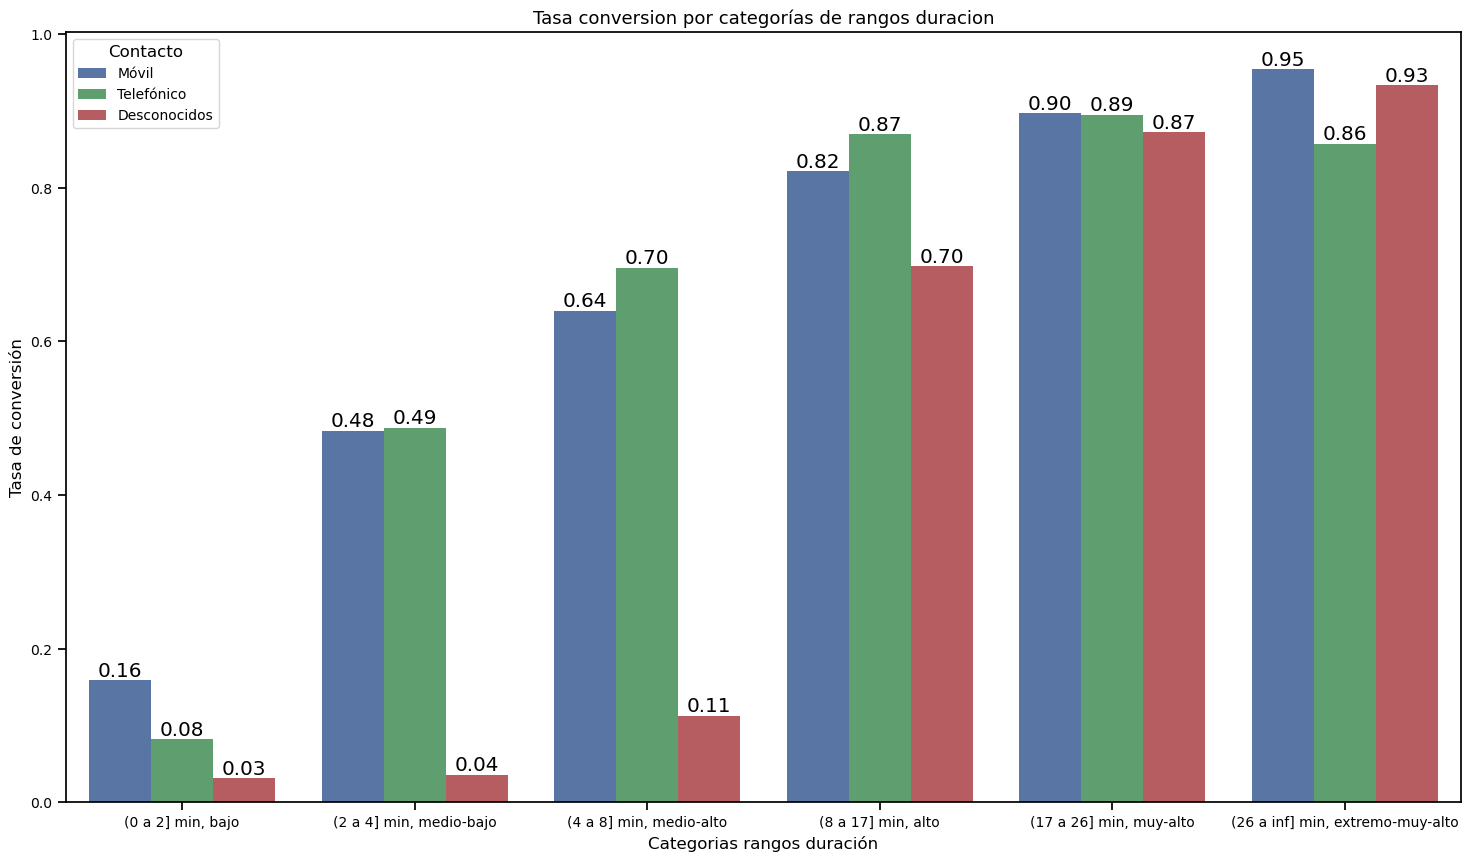

In [165]:
fig, ax = plt.subplots(figsize=(18, 10))
order = ['(0 a 2] min, bajo', '(2 a 4] min, medio-bajo', '(4 a 8] min, medio-alto', '(8 a 17] min, alto', '(17 a 26] min, muy-alto','(26 a inf] min, extremo-muy-alto']
ax=sns.barplot(x='rango_y_categ_duracion',y='tasa_conversion',data=df_marketing_group_by_categ_durat_contact,hue='contact',order = order,width=0.8)

#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Categorias rangos duración")
plt.ylabel("Tasa de conversión")
#ax.set_ylim(0, 0.95)

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
    
# Cambiar etiquetas de la leyenda
#new_labels = ['Móvil', 'Telefónico', 'Desconocidos']
#ax.legend(title='Contact', labels=new_labels)


# Cambiar etiquetas de la leyenda, manteniendo los colores
# Mapeo de valores originales de 'contact' a nuevos nombres
label_map = {'cellular': 'Móvil', 'telephone': 'Telefónico', 'unknown': 'Desconocidos'}

# Obtener los handles y labels de la leyenda original
handles, labels = ax.get_legend_handles_labels()

# Crear nueva leyenda con etiquetas mapeadas
new_labels = [label_map[label] for label in labels]
ax.legend(handles=handles, labels=new_labels, title='Contacto',loc='upper left')

# Mostrar gráfico
plt.show()

Del Sprint 1, vimos que era más probable que hubiera conversiones en los rangos medio alto y alto (ver probabilidades del diagrama de barras de abajo), así pues **centraremos los esfuerzos en estudiar la categoría medio-alto y la categoría alto**. 


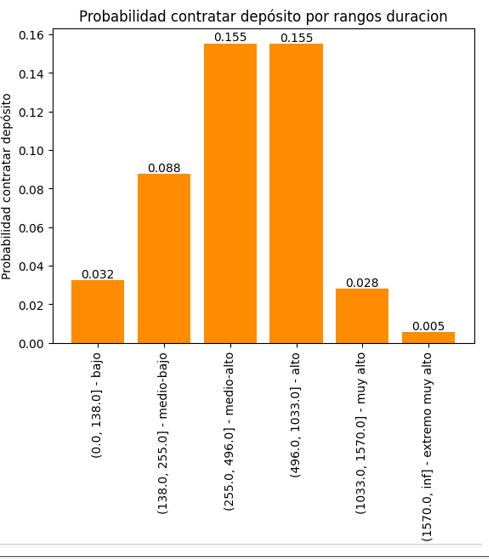

El peso de estas categorías en cuánto a registros las podemos calcular tal como sigue, para **medio-alto** son 2797 registros que supone el 25% y el 19,3% para alto.

In [166]:
total_registros=df_BANK_vista_marketing.shape[0]
filtro_categoria_medio_alto=df_marketing_group_by_categ_durat_contact['categoria_duration']=="medio-alto"
df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto]['total_registros'].sum()
por_medio_alto=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto]['total_registros'].sum()/total_registros
por_medio_alto


0.2511909917713296

In [167]:
total_registros=df_BANK_vista_marketing.shape[0]
filtro_categoria_medio_alto=df_marketing_group_by_categ_durat_contact['categoria_duration']=="alto"
df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto]['total_registros'].sum()
por_medio_alto=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto]['total_registros'].sum()/total_registros
por_medio_alto


0.19359029883066262

## 4. ¿Es estadísticamente significativo que las tasas de conversión de telefónica són superiores a las tasas de conversión para móviles en las 2 categorías de estudio?

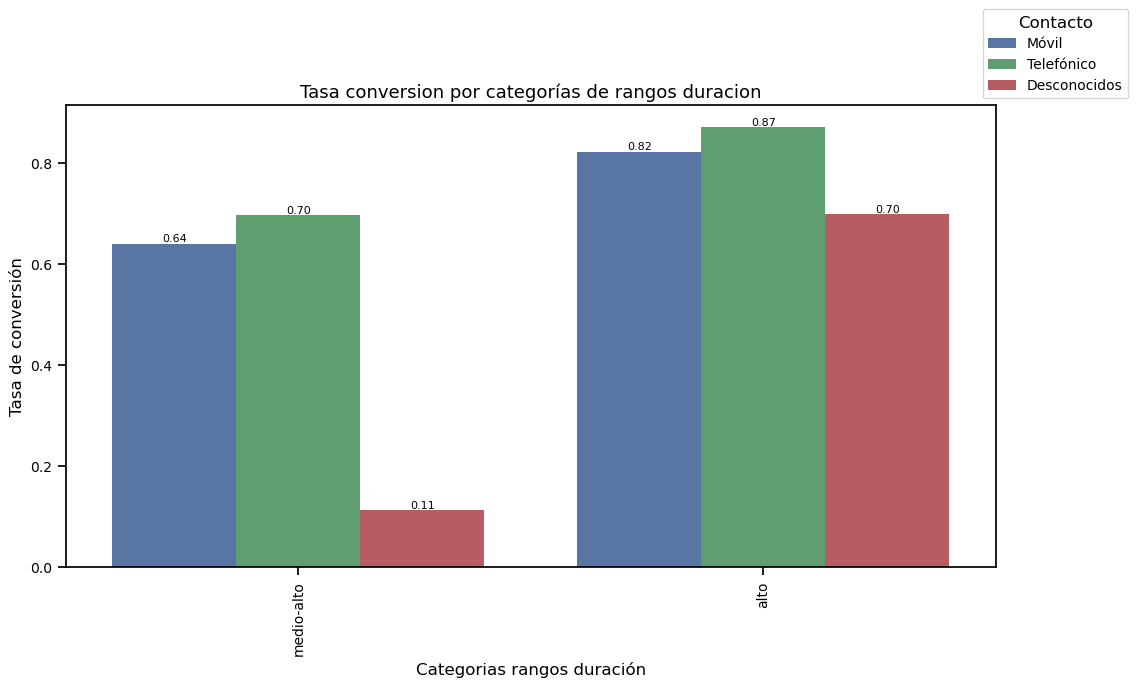

In [168]:
filtro_categorias_estudio=(df_marketing_group_by_categ_durat_contact['categoria_duration']=="medio-alto") | (df_marketing_group_by_categ_durat_contact['categoria_duration']=="alto")
order = [ 'medio-alto', 'alto']
ax=sns.barplot(x='categoria_duration',y='tasa_conversion',data=df_marketing_group_by_categ_durat_contact[filtro_categorias_estudio],hue='contact',order = order)

plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Categorias rangos duración")
plt.ylabel("Tasa de conversión")

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge',fontsize=8)
    
# Cambiar etiquetas de la leyenda
#new_labels = ['Móvil', 'Telefónico', 'Desconocidos']
#ax.legend(title='Contact', labels=new_labels)


# Cambiar etiquetas de la leyenda, manteniendo los colores
# Mapeo de valores originales de 'contact' a nuevos nombres
label_map = {'cellular': 'Móvil', 'telephone': 'Telefónico', 'unknown': 'Desconocidos'}

# Obtener los handles y labels de la leyenda original
handles, labels = ax.get_legend_handles_labels()

# Crear nueva leyenda con etiquetas mapeadas
new_labels = [label_map[label] for label in labels]
ax.legend(handles=handles, labels=new_labels, title='Contacto', loc='lower right', bbox_to_anchor=(1.15, 1))

# Mostrar gráfico
plt.show()


Podremos utilizar la **prueba de proporciones (Z-Test)** que es una herramienta estadística utilizada para comparar dos proporciones o tasas de conversion y determinar si la diferencia es estadísticamente significativa entre ellas. La proporción, es decir la tasa de conversión, como en realidad es como si fuera una media, es un estadística que tendrá una distribución normal por el teorema central del límite. Esta asumpción es importante, pues sinó no podríamos aplicar el Z-test

### 4.1 Determinar si la proporcion de cada muestra tiene un tamaño razonable para aplicar Z-test

Se debe cumplir n x p>5 y n x (1-p) > 5, donde n es el tamaño de la muestra y p es la proporcion de éxitos.



**Categoría medio-alto**

In [169]:
filtro_categoria_medio_alto=df_marketing_group_by_categ_durat_contact['categoria_duration']=="medio-alto"
df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto].iloc[0,3]

3103

In [170]:
df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto]

,categoria_duration,contact,tasa_conversion,total_registros,ord_categoria_duration,rango_y_categ_duracion
9,medio-alto,cellular,0.639704,3103,4,"(4 a 8] min, medio-alto"
10,medio-alto,telephone,0.695793,309,4,"(4 a 8] min, medio-alto"
11,medio-alto,unknown,0.112654,648,4,"(4 a 8] min, medio-alto"


In [171]:
n_cellular_ma=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto].iloc[0,3]
n_cellular_ma


3103

In [172]:
p_cellular_ma=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto].iloc[0,2]
p_cellular_ma

0.6397035127296165

In [173]:
tamaño_muestra_razonable_grupo_cellular=((n_cellular_ma*p_cellular_ma)>5) and ((n_cellular_ma*(1-p_cellular_ma))>5)
tamaño_muestra_razonable_grupo_cellular

True

In [174]:
n_telephone_ma=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto].iloc[1,3]
n_telephone_ma

309

In [175]:
p_telephone_ma=df_marketing_group_by_categ_durat_contact[filtro_categoria_medio_alto].iloc[1,2]
p_telephone_ma

0.6957928802588996

In [176]:
tamaño_muestra_razonable_grupo_telephone=((n_telephone_ma*p_telephone_ma)>5) and (n_telephone_ma*(1-p_telephone_ma)>5)
tamaño_muestra_razonable_grupo_telephone

True

**1. Cálculo de proporción combinada**

In [177]:
pcombinada_ma=(p_cellular_ma*n_cellular_ma+p_telephone_ma*n_telephone_ma)/(n_cellular_ma+n_telephone_ma)
pcombinada_ma

0.6447831184056271

**2. Cálculo varianza de la diferencia de las proporciones**


In [178]:
Varianza_dif_proporciones_ma=pcombinada_ma*(1-pcombinada_ma)*((1/n_cellular_ma)+(1/n_telephone_ma))
Varianza_dif_proporciones_ma

0.0008150345573368505

**3. Cálculo de Z**

**Podemos concluir que la tasa de conversión por llamada telefónica sí estará por encima de la de móvil en esta categoria de duración "medio-alta", ya que nos da por encima de 1,96 en valor absolut, con un p_valor=0,05**. Al dar en negativo, significa que tasa telefónica>tasa móvil. 

In [179]:
Z_ma=(p_cellular_ma-p_telephone_ma)/np.sqrt(Varianza_dif_proporciones_ma)
Z_ma

-1.9646831990532743

**Categoría alta**

In [180]:
filtro_categoria_alto=df_marketing_group_by_categ_durat_contact['categoria_duration']=="alto"

In [181]:
df_marketing_group_by_categ_durat_contact[filtro_categoria_alto]

,categoria_duration,contact,tasa_conversion,total_registros,ord_categoria_duration,rango_y_categ_duracion
0,alto,cellular,0.821580,2354,5,"(8 a 17] min, alto"
1,alto,telephone,0.869822,169,5,"(8 a 17] min, alto"
2,alto,unknown,0.698020,606,5,"(8 a 17] min, alto"


In [182]:
n_cellular_a=df_marketing_group_by_categ_durat_contact[filtro_categoria_alto].iloc[0,3]
n_cellular_a


2354

In [183]:
p_cellular_a=df_marketing_group_by_categ_durat_contact[filtro_categoria_alto].iloc[0,2]
p_cellular_a

0.8215802888700084

In [184]:
tamaño_muestra_razonable_grupo_cellular_a=((n_cellular_a*p_cellular_a)>5) and ((n_cellular_a*(1-p_cellular_a))>5)
tamaño_muestra_razonable_grupo_cellular_a

True

In [185]:
n_telephone_a=df_marketing_group_by_categ_durat_contact[filtro_categoria_alto].iloc[1,3]
n_telephone_a

169

In [186]:
p_telephone_a=df_marketing_group_by_categ_durat_contact[filtro_categoria_alto].iloc[1,2]
p_telephone_a

0.8698224852071006

In [187]:
tamaño_muestra_razonable_grupo_telephone_a=((n_telephone_a*p_telephone_a)>5) and ((n_telephone_a*(1-p_telephone_a))>5)
tamaño_muestra_razonable_grupo_telephone_a

True

**1. Cálculo de proporción combinada**

In [188]:
pcombinada_a=(p_cellular_a*n_cellular_a+p_telephone_a*n_telephone_a)/(n_cellular_a+n_telephone_a)
pcombinada_a

0.824811732065002

**2. Cálculo varianza de la diferencia de las proporciones**

In [189]:
Varianza_dif_proporciones_a=pcombinada_a*(1-pcombinada_a)*((1/n_cellular_a)+(1/n_telephone_a))
Varianza_dif_proporciones_a

0.0009163975848052435

**3. Cálculo de Z**

**En este caso al no darnos una Z<-1,96 NO podemos asegurar que llamar por teléfono tenga una tasa de conversión superior a la tasa de conversión de llamar con móvil** para este rango de duración "alto", con un p_valor=0,05.

In [190]:
Z_a=(p_cellular_a-p_telephone_a)/np.sqrt(Varianza_dif_proporciones_a)
Z_a

-1.5936212195380914

## 5. Juntar el grupo medio-alto y alto para estudiar la realción balance y edad con la tasación por contacto

In [191]:
filtro_duration_medio_alto_o_alto=(df_BANK_vista_marketing["categoria_duration"]=="medio-alto") | (df_BANK_vista_marketing["categoria_duration"]=="alto")
df_BANK_vista_marketing[filtro_duration_medio_alto_o_alto]

,id,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,categoria_duration,rango_duracion
4,5,unknown,5,may,579,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
5,6,unknown,5,may,673,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
6,7,unknown,5,may,562,2,-1,0,unknown,1,alto,"(498.0, 1036.5]"
8,9,unknown,6,may,1030,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
9,10,unknown,6,may,608,1,-1,0,unknown,1,alto,"(498.0, 1036.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...
16146,21367,unknown,6,may,678,1,-1,0,unknown,0,alto,"(498.0, 1036.5]"
16149,21370,cellular,25,may,464,1,321,1,failure,1,medio-alto,"(255.0, 498.0]"
16150,21371,cellular,21,aug,374,1,-1,0,unknown,1,medio-alto,"(255.0, 498.0]"
16153,21374,cellular,20,nov,326,1,-1,0,unknown,0,medio-alto,"(255.0, 498.0]"


In [192]:
df_group_by_categ_durat_contact_medio_alto_o_alto = df_BANK_vista_marketing[filtro_duration_medio_alto_o_alto].groupby(["contact"])["deposit"].agg(['mean','count'])
columns={'mean':'tasa_de_conversión','count':'total_registros'}
df_group_by_categ_durat_contact_medio_alto_o_alto.rename(columns={'mean':'tasa_conversion','count':'total_registros'},inplace=True)
df_group_by_categ_durat_contact_medio_alto_o_alto

,tasa_conversion,total_registros
contact,,
cellular,0.718160,5457
telephone,0.757322,478
unknown,0.395534,1254


In [193]:
df_group_by_categ_durat_contact_medio_alto_o_alto=df_group_by_categ_durat_contact_medio_alto_o_alto.reset_index()
df_group_by_categ_durat_contact_medio_alto_o_alto

,contact,tasa_conversion,total_registros
0,cellular,0.718160,5457
1,telephone,0.757322,478
2,unknown,0.395534,1254


C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\3216252355.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['móvil', 'teléfono','desconocidos'])


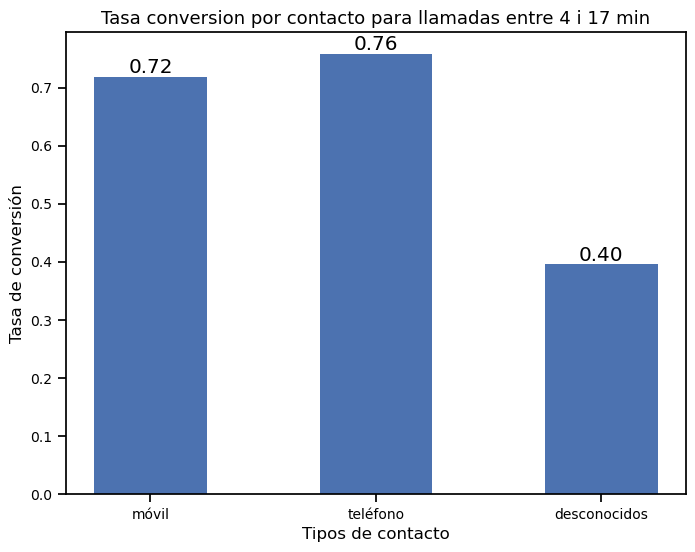

In [293]:
fig, ax = plt.subplots(figsize=(8, 6))
bars=ax.bar(df_group_by_categ_durat_contact_medio_alto_o_alto['contact'], df_group_by_categ_durat_contact_medio_alto_o_alto['tasa_conversion'],width=0.5)
# Añadir títulos y etiquetas
#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por contacto para llamadas entre 4 i 17 min")
plt.xlabel("Tipos de contacto")
plt.ylabel("Tasa de conversión")
ax.set_xticklabels(['móvil', 'teléfono','desconocidos'])

# Añadir los valores encima de las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

# Mostrar gráfico
plt.show()

In [195]:
cols=["id","age","balance","contact","duration","deposit"]
df_marketing_age_bal=df_BANK_marketing[cols]
df_marketing_age_bal["duration min"]=round(df_marketing_age_bal["duration"]/60,2)
df_marketing_age_bal

C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\2260208725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_age_bal["duration min"]=round(df_marketing_age_bal["duration"]/60,2)


,id,age,balance,contact,duration,deposit,duration min
0,1,59,2343,unknown,1042,1,17.37
1,2,59,2343,unknown,1042,1,17.37
2,3,56,45,unknown,1467,1,24.45
3,4,41,1270,unknown,1389,1,23.15
4,5,55,2476,unknown,579,1,9.65
...,...,...,...,...,...,...,...
16158,21379,26,1595,cellular,155,1,2.58
16159,21380,37,1967,cellular,242,1,4.03
16160,21381,45,81,cellular,61,0,1.02
16161,21382,44,618,cellular,193,1,3.22


In [196]:
def cuartiles_2(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR

    min_Q_ext=Q1 - 3*IQR
    max_Q_ext=Q3 + 3*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext

def clasificacion_duration_2(valor):
    
    if  valor < min_Q_ext:
        return ("extremo-muy-bajo inf a "+str(min_Q_ext)) 
    elif valor < min_Q:
        return ("muy-bajo "+str(min_Q_ext)+" a "+str(min_Q))
    elif valor < Q1:
        return ("bajo "+str(min_Q)+" a "+str(Q1))
    elif valor < Q2:
        return ("medio-bajo "+str(Q1)+" a "+str(Q2))
    elif valor < Q3:
        return ("medio-alto "+str(Q2)+" a "+str(Q3))
    elif valor < max_Q:
        return ("alto "+str(Q3)+" a "+str(max_Q))
    elif valor < max_Q_ext:
        return ("muy-alto "+str(max_Q)+" a "+str(max_Q_ext))
    else:
        return ("extremo-muy-alto "+str(max_Q_ext)+"a  inf")

In [197]:
Q1, Q2, Q3, min_Q, max_Q, min_Q_ext,max_Q_ext = cuartiles_2(df_marketing_age_bal['duration min'])

Q1=round(Q1,1)
Q2=round(Q2,1)
Q3=round(Q3,1)
min_Q=round(min_Q,1)
min_Q_ext=round(min_Q_ext,1)
max_Q=round(max_Q,1)
max_Q_ext=round(max_Q_ext,1)
df_marketing_age_bal["categoria_duration"] = df_marketing_age_bal["duration min"].apply(clasificacion_duration_2)

C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\2964523008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_age_bal["categoria_duration"] = df_marketing_age_bal["duration min"].apply(clasificacion_duration_2)


In [198]:
def cuartiles_3(df):
    #calcular cuartiles
    Q33 = df.quantile(0.33)
    Q66 = df.quantile(0.66)
       
    return Q33, Q66

def clasificacion_variable(valor):
    
    if  valor  <Q33:
        return ("bajo infer a "+str(Q33)) 
    elif valor <Q66:
        return ("medio "+str(Q33)+" a "+str(Q66))
    else:
        return ("alto super a "+str(Q66))

In [199]:
Q33, Q66 = cuartiles_3(df_marketing_age_bal['age'])
df_marketing_age_bal["categoria_age"] = df_marketing_age_bal["age"].apply(clasificacion_variable)
Q33, Q66 = cuartiles_3(df_marketing_age_bal['balance'])
df_marketing_age_bal["categoria_balance"] = df_marketing_age_bal["balance"].apply(clasificacion_variable)

#filtre=df_marketing_age_bal['age']<=45
#df_marketing_age_bal[filtre]
df_marketing_age_bal

C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\84300418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_age_bal["categoria_age"] = df_marketing_age_bal["age"].apply(clasificacion_variable)
C:\Users\gorka\AppData\Local\Temp\ipykernel_9724\84300418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_marketing_age_bal["categoria_balance"] = df_marketing_age_bal["balance"].apply(clasificacion_variable)


,id,age,balance,contact,duration,deposit,duration min,categoria_duration,categoria_age,categoria_balance
0,1,59,2343,unknown,1042,1,17.37,muy-alto 17.3 a 26.2,alto super a 45.0,alto super a 1125.0
1,2,59,2343,unknown,1042,1,17.37,muy-alto 17.3 a 26.2,alto super a 45.0,alto super a 1125.0
2,3,56,45,unknown,1467,1,24.45,muy-alto 17.3 a 26.2,alto super a 45.0,bajo infer a 230.0
3,4,41,1270,unknown,1389,1,23.15,muy-alto 17.3 a 26.2,medio 34.0 a 45.0,alto super a 1125.0
4,5,55,2476,unknown,579,1,9.65,alto 8.3 a 17.3,alto super a 45.0,alto super a 1125.0
...,...,...,...,...,...,...,...,...,...,...
16158,21379,26,1595,cellular,155,1,2.58,medio-bajo 2.3 a 4.2,bajo infer a 34.0,alto super a 1125.0
16159,21380,37,1967,cellular,242,1,4.03,medio-bajo 2.3 a 4.2,medio 34.0 a 45.0,alto super a 1125.0
16160,21381,45,81,cellular,61,0,1.02,bajo -6.6 a 2.3,alto super a 45.0,bajo infer a 230.0
16161,21382,44,618,cellular,193,1,3.22,medio-bajo 2.3 a 4.2,medio 34.0 a 45.0,medio 230.0 a 1125.0


In [200]:
df_marketing_age_bal[df_marketing_age_bal["contact"]=='cellular']

,id,age,balance,contact,duration,deposit,duration min,categoria_duration,categoria_age,categoria_balance
368,369,28,-127,cellular,1044,1,17.40,muy-alto 17.3 a 26.2,bajo infer a 34.0,bajo infer a 230.0
369,370,55,49,cellular,494,1,8.23,medio-alto 4.2 a 8.3,alto super a 45.0,bajo infer a 230.0
370,371,51,216,cellular,615,1,10.25,alto 8.3 a 17.3,alto super a 45.0,bajo infer a 230.0
371,372,39,506,cellular,718,1,11.97,alto 8.3 a 17.3,medio 34.0 a 45.0,medio 230.0 a 1125.0
372,373,42,213,cellular,434,1,7.23,medio-alto 4.2 a 8.3,medio 34.0 a 45.0,bajo infer a 230.0
...,...,...,...,...,...,...,...,...,...,...
16158,21379,26,1595,cellular,155,1,2.58,medio-bajo 2.3 a 4.2,bajo infer a 34.0,alto super a 1125.0
16159,21380,37,1967,cellular,242,1,4.03,medio-bajo 2.3 a 4.2,medio 34.0 a 45.0,alto super a 1125.0
16160,21381,45,81,cellular,61,0,1.02,bajo -6.6 a 2.3,alto super a 45.0,bajo infer a 230.0
16161,21382,44,618,cellular,193,1,3.22,medio-bajo 2.3 a 4.2,medio 34.0 a 45.0,medio 230.0 a 1125.0


In [201]:
df_marketing_age_bal["categoria_duration"].value_counts()

categoria_duration
medio-alto 4.2 a 8.3           4159
medio-bajo 2.3 a 4.2           3982
bajo -6.6 a 2.3                3973
alto 8.3 a 17.3                3131
muy-alto 17.3 a 26.2            759
extremo-muy-alto 26.2a  inf     159
Name: count, dtype: int64

In [281]:
is_duration_medio_alto=df_marketing_age_bal["categoria_duration"]=="medio-alto 4.2 a 8.3"
is_duration_alto=df_marketing_age_bal["categoria_duration"]=="alto 8.3 a 17.3"
filtro_duration_medio_alto_0_alto=(is_duration_medio_alto | is_duration_alto)
df_mark_age_bal_medio_alto_o_alto=df_marketing_age_bal[filtro_duration_medio_alto_0_alto]


df_groupby=df_mark_age_bal_medio_alto_o_alto.groupby(["contact","categoria_age","categoria_balance"])["deposit"].agg(['mean','count'])
df_groupby.rename(columns={'mean':'tasa_conversion','count':'total_registros'},inplace=True)
df_groupby=df_groupby.reset_index()
df_groupby[df_groupby["contact"] == 'telephone'].sort_values("tasa_conversion",ascending=False)

filter_cellular=df_groupby['contact']=="cellular"
cols=["categoria_age","categoria_balance","tasa_conversion"]
df_groupby_cellular=df_groupby[filter_cellular][cols]
df_groupby_cellular

# Mostrar todas las filas temporalmente
#with pd.option_context('display.max_rows', None):
#    print(df_groupby[df_groupby["contact"] == 'cellular'])


,categoria_age,categoria_balance,tasa_conversion
0,alto super a 45.0,alto super a 1125.0,0.786382
1,alto super a 45.0,bajo infer a 230.0,0.668113
2,alto super a 45.0,medio 230.0 a 1125.0,0.758562
3,bajo infer a 34.0,alto super a 1125.0,0.776490
4,bajo infer a 34.0,bajo infer a 230.0,0.685092
5,bajo infer a 34.0,medio 230.0 a 1125.0,0.742816
6,medio 34.0 a 45.0,alto super a 1125.0,0.743902
7,medio 34.0 a 45.0,bajo infer a 230.0,0.599364
8,medio 34.0 a 45.0,medio 230.0 a 1125.0,0.655797


In [282]:
df_groupby_cellular_reset=df_groupby_cellular.reset_index()
df_groupby_cellular_pivot = df_groupby_cellular.pivot(index="categoria_age", columns="categoria_balance", values="tasa_conversion")
#pivot_df["total_registros"]=pivot_df["cellular"]+pivot_df["telephone"]+pivot_df["unknown"]
df_groupby_cellular_pivot


categoria_balance,alto super a 1125.0,bajo infer a 230.0,medio 230.0 a 1125.0
categoria_age,,,
alto super a 45.0,0.786382,0.668113,0.758562
bajo infer a 34.0,0.776490,0.685092,0.742816
medio 34.0 a 45.0,0.743902,0.599364,0.655797


In [287]:
df_groupby_cellular_pivot=df_groupby_cellular_pivot.reset_index()
df_groupby_cellular_pivot

categoria_balance,categoria_age,bajo infer a 230.0,medio 230.0 a 1125.0,alto super a 1125.0
0,alto super a 45.0,0.668113,0.758562,0.786382
1,medio 34.0 a 45.0,0.599364,0.655797,0.743902
2,bajo infer a 34.0,0.685092,0.742816,0.776490


In [288]:
df_groupby_cellular_pivot['categoria_age']

0    alto super a 45.0
1    medio 34.0 a 45.0
2    bajo infer a 34.0
Name: categoria_age, dtype: category
Categories (3, object): ['alto super a 45.0' < 'medio 34.0 a 45.0' < 'bajo infer a 34.0']

In [290]:
ordre_age = ['alto super a 45.0','medio 34.0 a 45.0','bajo infer a 34.0']

#print(df_groupby_cellular_pivot['categoria_age'].unique())

# Convertir 'categoria_age' a categórica con el orden deseado
df_groupby_cellular_pivot['categoria_age'] = pd.Categorical(df_groupby_cellular_pivot['categoria_age'], categories=ordre_age, ordered=True)

# Ordenar el DataFrame por 'categoria_age'
df_groupby_cellular_pivot = df_groupby_cellular_pivot.sort_values('categoria_age')

# Definir el nuevo orden de las columnas
column_order = ['categoria_age','bajo infer a 230.0', 'medio 230.0 a 1125.0', 'alto super a 1125.0']

# Reordenar las columnas
df_groupby_cellular_pivot = df_groupby_cellular_pivot [column_order]

# Mostrar el DataFrame ordenado
df_groupby_cellular_pivot
df_groupby_cellular_pivot=df_groupby_cellular_pivot.set_index("categoria_age")
df_groupby_cellular_pivot

categoria_balance,bajo infer a 230.0,medio 230.0 a 1125.0,alto super a 1125.0
categoria_age,,,
alto super a 45.0,0.668113,0.758562,0.786382
medio 34.0 a 45.0,0.599364,0.655797,0.743902
bajo infer a 34.0,0.685092,0.742816,0.776490


Text(117.24999999999999, 0.5, 'Rangos de edad')

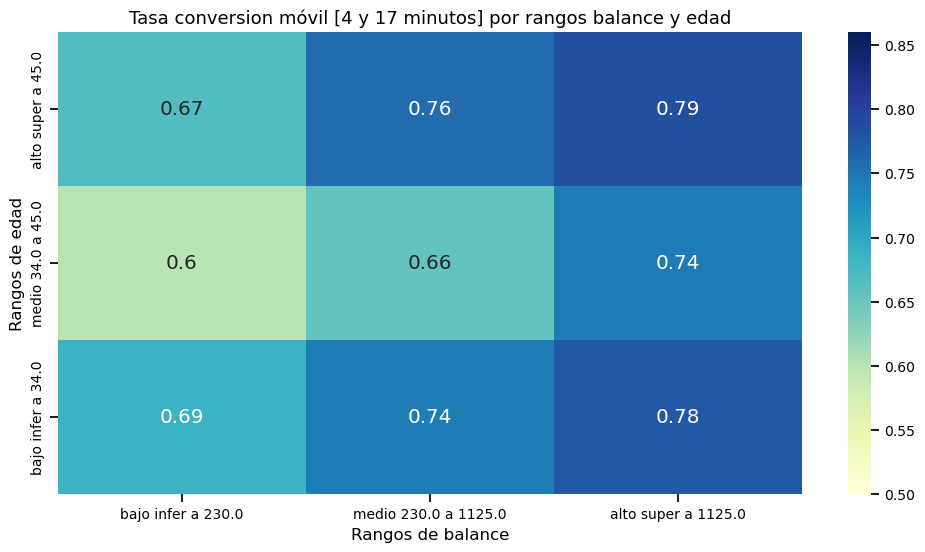

In [292]:
# Default heatmap
p1 = sns.heatmap(df_groupby_cellular_pivot,annot=True,cmap="YlGnBu",vmin=0.5,vmax=0.86)
plt.title("Tasa conversion móvil [4 y 17 minutos] por rangos balance y edad")
plt.xlabel("Rangos de balance")
plt.ylabel("Rangos de edad")



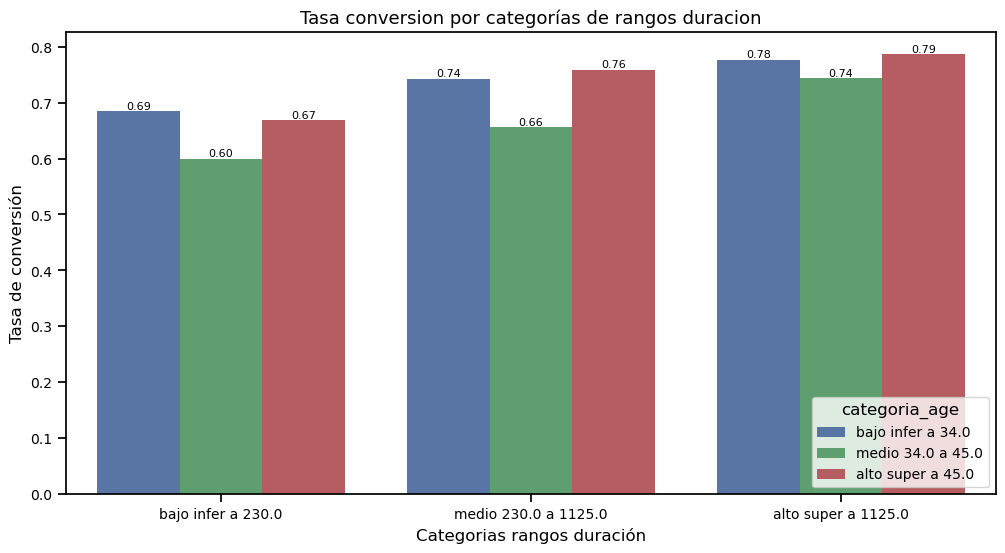

In [112]:
filtro_estudio=df_groupby['contact']=="cellular"
order = [ 'bajo infer a 230.0', 'medio 230.0 a 1125.0','alto super a 1125.0']
hue_order=['bajo infer a 34.0','medio 34.0 a 45.0', 'alto super a 45.0']
ax=sns.barplot(x='categoria_balance',y='tasa_conversion',data=df_groupby[filtro_estudio],hue='categoria_age', order=order, hue_order=hue_order)

#plt.xticks(rotation=90,fontsize=10)
plt.title("Tasa conversion por categorías de rangos duracion")
plt.xlabel("Categorias rangos duración")
plt.ylabel("Tasa de conversión")

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge',fontsize=8)
    
# Cambiar etiquetas de la leyenda
#new_labels = ['Móvil', 'Telefónico', 'Desconocidos']
#ax.legend(title='Contact', labels=new_labels)


# Cambiar etiquetas de la leyenda, manteniendo los colores
# Mapeo de valores originales de 'contact' a nuevos nombres
#label_map = {'cellular': 'Móvil', 'telephone': 'Telefónico', 'unknown': 'Desconocidos'}

# Obtener los handles y labels de la leyenda original
handles, labels = ax.get_legend_handles_labels()

# Crear nueva leyenda con etiquetas mapeadas
#new_labels = [label_map[label] for label in labels]
ax.legend(handles=handles, title='categoria_age', loc='lower right')

# Mostrar gráfico
plt.show()

In [93]:
df_mark_age_bal_medio_alto_o_alto[df_mark_age_bal_medio_alto_o_alto["contact"]=='telephone']

,id,age,balance,contact,duration,deposit,duration min,categoria_age,categoria_balance,categoria_duration
486,487,31,-277,telephone,1008,1,16.80,bajo infer a 34.0,bajo infer a 230.0,alto 8.3 a 17.3
519,520,39,1423,telephone,733,1,12.22,medio 34.0 a 45.0,alto super a 1125.0,alto 8.3 a 17.3
523,524,42,970,telephone,691,1,11.52,medio 34.0 a 45.0,medio 230.0 a 1125.0,alto 8.3 a 17.3
543,544,37,1110,telephone,802,1,13.37,medio 34.0 a 45.0,medio 230.0 a 1125.0,alto 8.3 a 17.3
585,586,39,1444,telephone,362,1,6.03,medio 34.0 a 45.0,alto super a 1125.0,medio-alto 4.2 a 8.3
...,...,...,...,...,...,...,...,...,...,...
16060,21281,26,19,telephone,268,0,4.47,bajo infer a 34.0,bajo infer a 230.0,medio-alto 4.2 a 8.3
16083,21304,34,676,telephone,486,1,8.10,medio 34.0 a 45.0,medio 230.0 a 1125.0,medio-alto 4.2 a 8.3
16102,21323,54,4401,telephone,414,1,6.90,alto super a 45.0,alto super a 1125.0,medio-alto 4.2 a 8.3
16112,21333,72,2304,telephone,510,1,8.50,alto super a 45.0,alto super a 1125.0,alto 8.3 a 17.3
